## **1. Importing Libraries**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.pipeline import make_pipeline
import seaborn as sns

## **2. Load Dataset [spam.csv](https://www.kaggle.com/datasets/mfaisalqureshi/spam-email)**

In [55]:
data = pd.read_csv("spam.csv")
print(data.head())
print(data.shape)
print(data.columns)

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
(5572, 2)
Index(['Category', 'Message'], dtype='object')


## **3. Encoding Categorical Data**

In [56]:
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
print(data)

      Category                                            Message
0            0  Go until jurong point, crazy.. Available only ...
1            0                      Ok lar... Joking wif u oni...
2            1  Free entry in 2 a wkly comp to win FA Cup fina...
3            0  U dun say so early hor... U c already then say...
4            0  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
5567         1  This is the 2nd time we have tried 2 contact u...
5568         0               Will ü b going to esplanade fr home?
5569         0  Pity, * was in mood for that. So...any other s...
5570         0  The guy did some bitching but I acted like i'd...
5571         0                         Rofl. Its true to its name

[5572 rows x 2 columns]


## **4. Train Test Split**

In [57]:
x= data['Message']
y = data['Category']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900,)
(1672,)
(3900,)
(1672,)


## **5. Training a Spam detection model using word counts and Naive Bayes.**

In [71]:
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

## **6. Evaluation metric**

In [59]:
acc = accuracy_score(y_pred,y_test)
print(acc*100,"%")

99.04306220095694 %


In [60]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1444    4]
 [  12  212]]


In [61]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.98      0.95      0.96       224

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



## **7. Confusion Matrix for Model Evaluation**

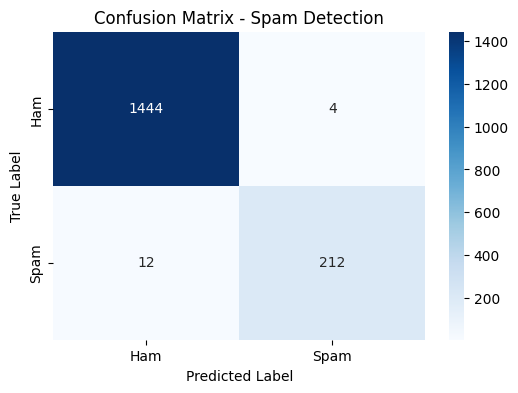

In [62]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Ham', 'Spam']  #'Ham' = 0 and 'Spam' = 1
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Spam Detection')
plt.show()


## **8. Predicting for real-time emails**

In [72]:
while True:
    user_input = input("Enter a message to check (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    prediction = model.predict([user_input])
    label = le.inverse_transform(prediction)[0]
    print(f"'{user_input}' => {label}\n")

Enter a message to check (or type 'exit' to quit): Apply now for a free gift
'Apply now for a free gift' => spam

Enter a message to check (or type 'exit' to quit): Final reminder for exclusive offer
'Final reminder for exclusive offer' => spam

Enter a message to check (or type 'exit' to quit): Meet me at the office at 2 PM
'Meet me at the office at 2 PM' => ham

Enter a message to check (or type 'exit' to quit): Hello, how are you?
'Hello, how are you?' => ham

Enter a message to check (or type 'exit' to quit): exit
